# Collision of Two Jovian Planets

* Should I be using classes to model the particles?

## Roadmap
* Initialization
    * Initialize position
        * Use for loop, and make consecutive rings of points
    * Initialize velocity
        * Uniform velocity for every particle in planet
    * Initialize mass
        * Every particle gets the same mass
            * For now? Or for always?
    * Assign density $\rho_i$
        * Use [equation 4.5] to assign density
        * $ \rho(r) = \sum_{j=1}^N \rho_j (r)$
    * Choose time scale
        * Time must satisfy the CFL condition [equation 4.12]
        
* Calculate gravitational forces $\nabla \Phi_i$
    * First pass can use brute force O(N^2) method [equation 3.1]
    * Second pass would use trees or FFT
    
* Calculate pressure $P_i$, given density $\rho_i$
    * For the outer layer, $P = \frac{R_g}{\mu} \rho T $
    * More generaly, the 'entire'?? planet can be modeled with $P = K \rho ^\gamma$ 
    * [Equations 4.14 - 4.17] go into more detail

* Calculate $\nabla P_i$
    * Can be done by combining [equations 4.3, 4.4, 4.5, and 4.9]
        * First: calculate Gaussian kernel
        * Second: multiply Gaussian kernel by mass of a specified particle j (this can be done in batch)
        * Third: Sum over local $\rho_j$ to find $\rho_i$
        * Fourth: Sum [ (mass * pressure_j/ density_j) * gradient(kernel) ]
    * Smoothing length
        * First pass: uniform
        * Second pass: locally adaptive

* Calculate change in velocity $v_i$ [equation 4.2], given pressure, density, and gravitational forces
    * This involves solving an ODE
        * First pass: RK4
        * If bad: RK1
        * And then: Leapfrog
        
* Calculate change in position $r_i$ [equation], given velocity
    * This involves solving an ODE
        * First pass: RK4
        * If bad: RK1
        * And then: Leapfrog
        
        
        
### Initialize Libraries

In [1]:
%matplotlib inline

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

### Initialize Model Constants

In [3]:
RJupiter = 1e5    # km


gamma = 2
G = 6.67e-8    # dyne*cm^2/g^2

rhoC = 5    # g/cm^3, central density
PC = 6.5e13    # dyne/cm^2
TC = 22000    # K

K = 2.6e12    # dyne*cm^4/g^2

alpha = np.sqrt(K/(2*np.pi*G))

### Initialize Density

In [ ]:
rNum = 100     
rspace = np.linspace(0,)


### Initialize Positions of Planets

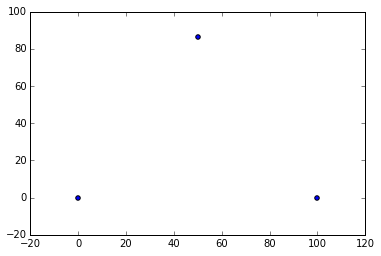

In [19]:
RParticle = 1e2   # km

N1 = 100    # Particles in Planet 1
N2 = N1     # Particles in Planet 2

#position1, position2 = np.zeros((N1, 2)), np.zeros((N2, 2))

#rspace1 = np.linspace(0, RJupiter, N1)
#thetaspace1 = np.linspace(0, 2*np.pi, N1)

# 
plt.scatter([0, RParticle*np.cos(0), RParticle*np.cos(np.pi/3)],[0, RParticle*np.sin(0), RParticle*np.sin(np.pi/3)])

# Notes
* Make consecutive rings to initialize position. Use a for loop to loop through radii. Increase theta every ring sampling 
    * ie: for r in rlist: for theta in range(2*r): ...